
# Customer Churn Prediction Using Artificial Neural Network (ANN)

Customer churn, also known as customer attrition or customer turnover, refers to the loss of customers or clients over a specific period. It is a critical issue for businesses across various industries. Customer churn refers to the phenomenon of customers discontinuing their relationship with a business or brand. It can have a significant impact on a company’s profitability and long-term success. 

This project uses Artificial Neural Network to predict customer churn on a sample dataset from Kaggle- [Credit Card Customer Churn Prediction](https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction)

## Project Objectives:

- Understanding Customer Churn Prediction
- How can artificial neural networks (ANN) help in predicting customer churn?
- Use Python Language for this Project and Importing the Libraries
- Data Analysis & Visualization
- Apply One Hot Encoding Technique & Handling the Imbalanced Dataset
- Splitting the Dataset & Feature Scaling
- Build, Train & Evaluating the ANN Model




### Why is customer churn prediction important?

Customer churn prediction plays a crucial role in customer retention strategies and business growth. By identifying customers who are likely to churn in the future, companies can take proactive measures to mitigate the risk and prevent customer loss.

### How can artificial neural networks (ANN) help in predicting customer churn?

ANNs can handle both numerical and categorical data, making them versatile for analyzing customer-related features such as demographics, purchasing behavior, and engagement metrics. By training an ANN model on historical customer data with known churn outcomes, the model can learn the underlying patterns that indicate the likelihood of churn. Once trained, the ANN model can predict churn for new customers based on their characteristics and behavior.

## Project Overview: Customer Churn Prediction using ANN

- Importing the Libraries
- Data Analysis & Visualization
- Apply One Hot Encoding Technique on Gender & Geography Column
- Handle the Imbalanced Target Column and Balance It
- Splitting the Dataset into Training and Testing Sets
- Feature Scaling - Sklearn Standard Scaler Technique
- Build the Artificial Neural Network (ANN) Model
- Training the ANN Model
- Evaluating the ANN Model & Predicting Churn for New Customers



## Step 1: Importing the Libraries

The required libraries :

- `NumPy` for numerical computations
- `Pandas` for data manipulation and analysis
- `Matplotlib` and `Seaborn` for data visualization
- `Scikit-learn` for preprocessing and model evaluation
- `Tensorflow` and `Keras` for building and training the ANN model

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Step 2: Data Analysis & Visualization
**Reading the dataset:** Load the dataset into a pandas DataFrame to start our analysis.

In [2]:
# read the dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.xls')

# see the first five rows of df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Checking the shape of the dataset:** Examine the dimensions of the dataset.

In [3]:
# see the shape of df
df.shape

(10000, 14)

**Getting the information of the dataset:** Inspect the data types of each column.

In [4]:
# see the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Descriptive statistics of the dataset:** Calculate basic statistics such as mean, standard deviation, and quartiles to understand the distribution of numerical variables.

In [5]:
# see the descriptive statistics of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Checking for duplicate values:** Identify and remove any duplicate rows in the dataset.

In [6]:
# see the duplicates values in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

**Checking for null values:** Check if there are any missing values in the dataset and handle them appropriately.

In [7]:
# check the null values in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Dropping irrelevant columns:** Drop any columns that are not relevant for our churn prediction analysis.

In [8]:
# drop the irrelevant columns 
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

**Analyzing and Visualizing specific columns:** Explore and visualize columns such as “Geography,” “Gender,” “Number of Products,” “Has Credit Card,” “Is Active Member,” and the target column “Exited.”

**Analysis & Visualization of Geography Feature**

In [9]:
# check the value counts of "Geography" column.
df_geography = df['Geography'].value_counts()
df_geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

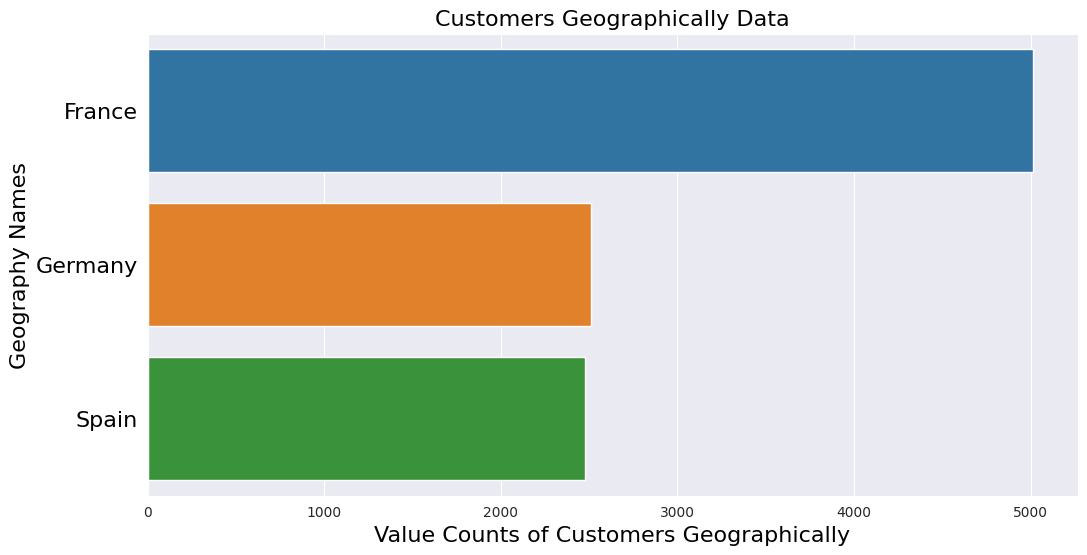

In [10]:
# let's perform univarient eda on "Geography" column. 
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_geography, y=df_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Geographically',fontsize = 16, color='black')
plt.ylabel('Geography Names',fontsize = 16, color='black')
plt.title('Customers Geographically Data',fontsize = 16, color='black')
plt.show()

**Analysis & Visualization of Gender Feature**

In [11]:
# check the value counts of "Gender" column.
df_gender = df['Gender'].value_counts()
df_gender

Male      5457
Female    4543
Name: Gender, dtype: int64

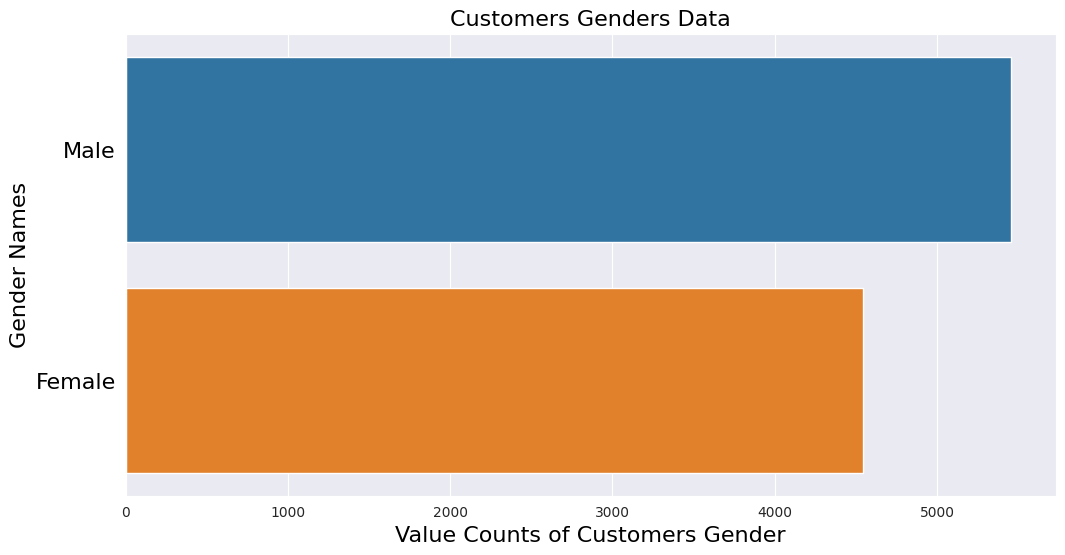

In [12]:
# let's perform univarient eda on "Gender" column. 
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Gender',fontsize = 16, color='black')
plt.ylabel('Gender Names',fontsize = 16, color='black')
plt.title('Customers Genders Data',fontsize = 16, color='black')
plt.show()

**Analysis & Visualization of NumOfProducts Feature**

In [13]:
# check the value counts of "number of products" column.
df_nop = df['NumOfProducts'].value_counts()
df_nop

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<ipython-input-14-01a328d1d97d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


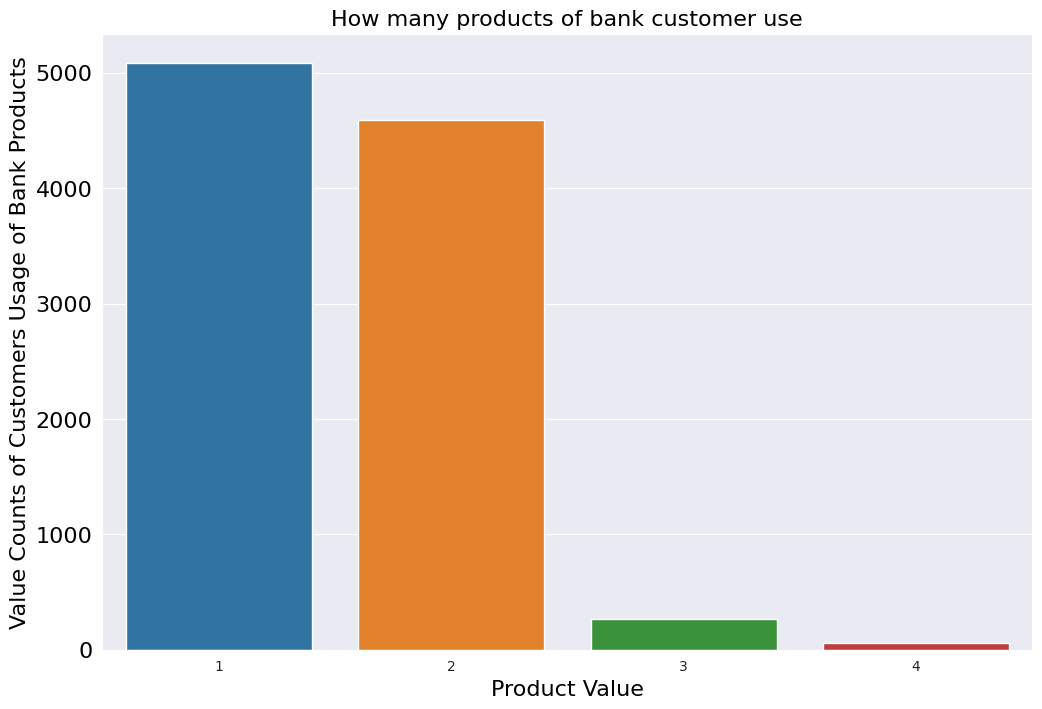

In [14]:
# let's perform univarient eda on "number of products" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_nop, x=df_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Usage of Bank Products',fontsize = 16, color='black')
plt.xlabel('Product Value',fontsize = 16, color='black')
plt.title('How many products of bank customer use',fontsize = 16, color='black')
plt.show()

**Analysis & Visualization of HasCrCard Feature**

In [15]:
# check the value counts of "HasCrCard" column.
df_crc = df['HasCrCard'].value_counts()
df_crc

1    7055
0    2945
Name: HasCrCard, dtype: int64

<ipython-input-16-ec385fccbd4c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


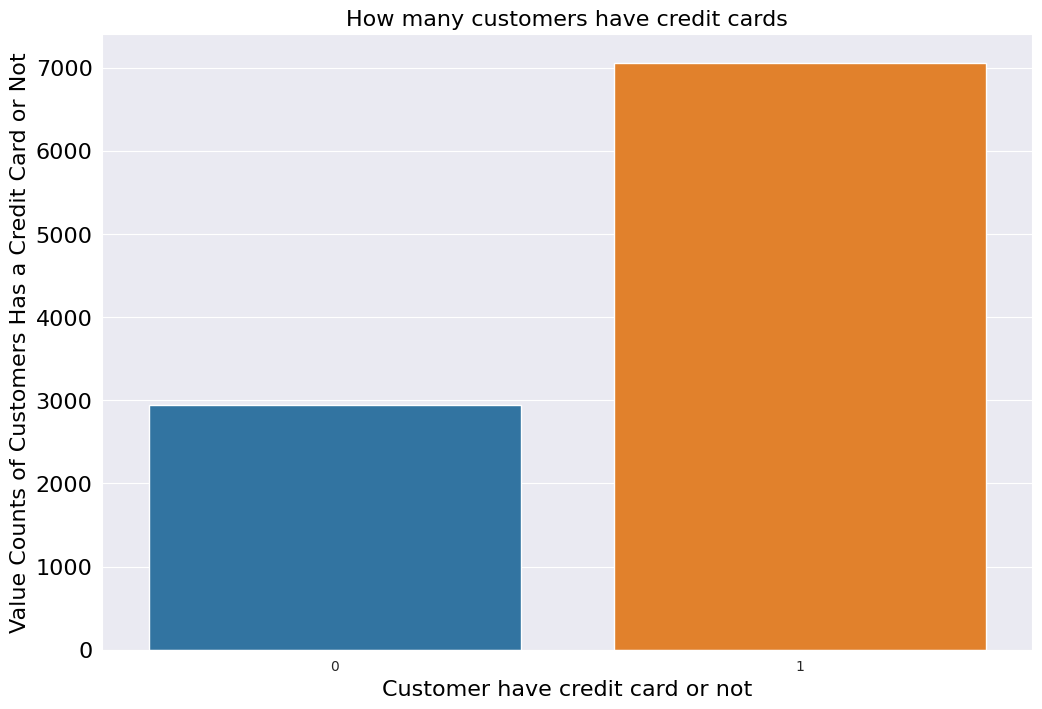

In [16]:
# let's perform univarient eda on "HasCrCard" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_crc, x=df_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Has a Credit Card or Not',fontsize = 16, color='black')
plt.xlabel('Customer have credit card or not',fontsize = 16, color='black')
plt.title('How many customers have credit cards',fontsize = 16, color='black')
plt.show()

**Analysis & Visualization of IsActiveMember Feature**

In [17]:
# check the value counts of "IsActiveMember" column.
df_iam = df['IsActiveMember'].value_counts()
df_iam

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<ipython-input-18-5c8e89f6ecd4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


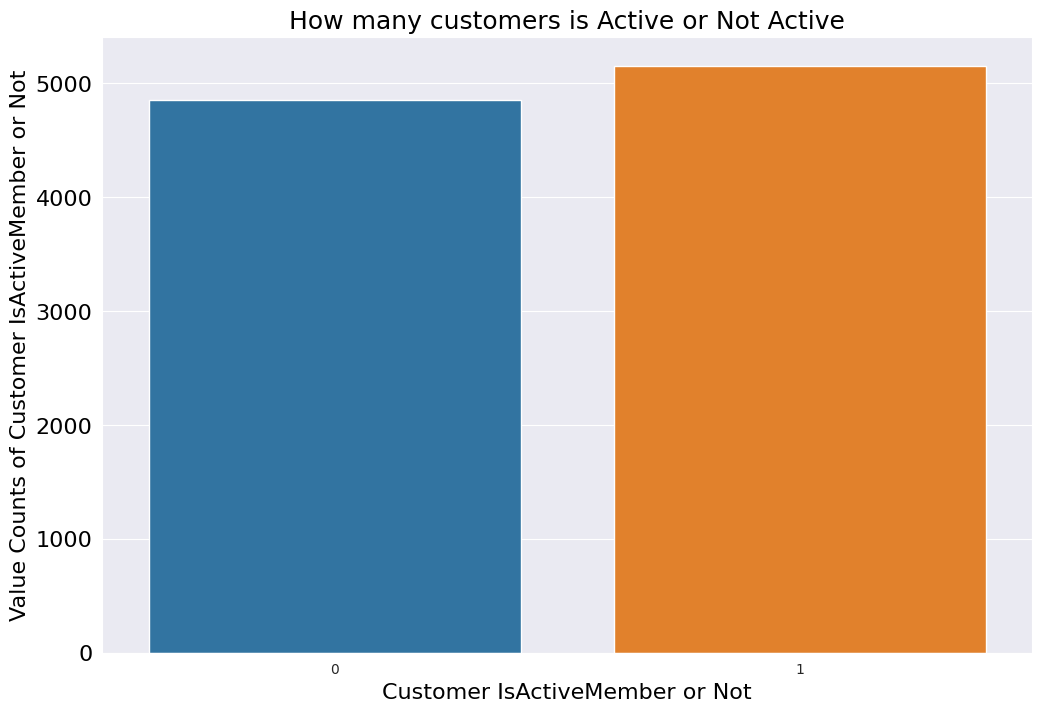

In [18]:
# let's perform univarient eda on "IsActiveMember" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_iam, x=df_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.xlabel('Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.title('How many customers is Active or Not Active',fontsize = 18, color='black')
plt.show()

**Analysis & Visualization of “Exited” target column**

In [19]:
# check the value counts of "Exited" target column.
df_exit = df['Exited'].value_counts()
df_exit

0    7963
1    2037
Name: Exited, dtype: int64

<ipython-input-20-277a1453c4b3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


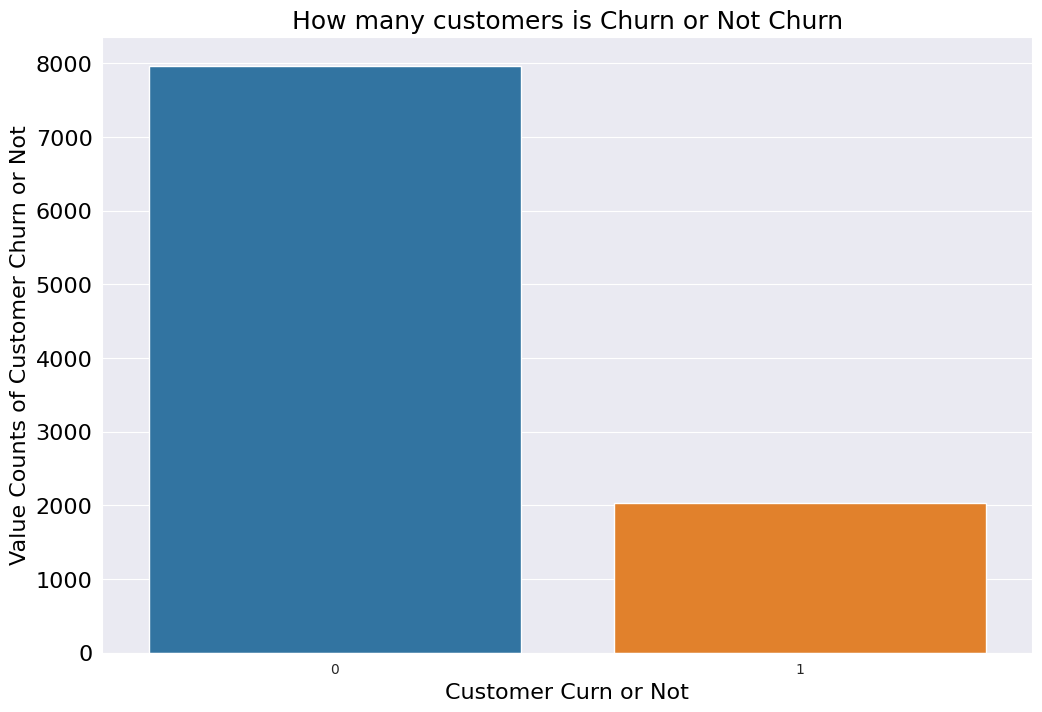

In [20]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

## Step 3: Apply One Hot Encoding Technique on Gender & Geography Column

Since our dataset contains categorical variables like “Gender” and “Geography,” we need to convert them into numerical format for the ANN model to process. We apply the one-hot encoding technique to transform these categorical columns into binary columns, representing different categories.

In [21]:
# use pandas dummies funtion for one hot encodeing 
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

## Step 4: Handle the Imbalanced Target Column and Balance It

Customer churn datasets often suffer from class imbalance, where the number of churners is significantly smaller than non-churners. To address this issue, we will balance the target column by upsampling the minority class. This ensures that the model does not get biased towards the majority class during training.

In [22]:
# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [23]:
# check the target_balanced_data
balanced_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,49,4,128504.76,1,1,0,126812.63,1,0,1,0
9337,466,47,5,102085.72,1,1,1,183536.24,1,0,1,0
4345,720,46,3,97042.60,1,1,1,133516.51,1,1,1,0
1085,803,42,5,0.00,1,1,0,196466.83,1,1,0,0


In [24]:
# check again the value counts of "Exited" target column after the balancing the data.
df_exit = balanced_data['Exited'].value_counts()
df_exit

0    7963
1    7963
Name: Exited, dtype: int64

## Step 5: Splitting the Dataset into Training and Testing Sets

Before training our ANN model, we need to preprocess the data by separating the features and the target variable. we split the dataset into training and testing sets. The training set is used to train the model on historical data, while the testing set is used to evaluate the model’s performance on unseen data. Typically, around 70–80% of the data is used for training, and the remaining 20–30% is used for testing.

In [25]:
# # split the feature in x variable and target varible in y variable
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)

In [26]:
# use sklearn for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (12740, 11)
X_test Shape :  (3186, 11)
y_train Shape :  (12740,)
y_test Shape :  (3186,)


## Step 6: Feature Scaling - Sklearn Standard Scaler Technique

Feature scaling is an essential preprocessing step for ANN models. It standardizes the range of input features, ensuring that they have similar scales. This step prevents certain features from dominating others during the training process. We apply feature scaling using techniques such as Sklearn Standard Scaler Technique for Standardized the Input Features Values.

In [28]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# check the X_train_scaled values
X_train_scaled

array([[ 1.74458075e+00,  2.64948525e-01,  1.02260197e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 1.24130320e+00,  7.61019204e-02,  8.82175645e-04, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 8.06835512e-02, -1.83213817e-02,  1.02260197e+00, ...,
         9.74118179e-01,  1.50360032e+00, -5.47359263e-01],
       ...,
       [ 3.16915869e-01, -8.68131101e-01,  8.82175645e-04, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [ 4.60709454e-01, -4.90437892e-01, -3.39691089e-01, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [-2.68529441e-01, -1.12744684e-01,  1.70374850e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01]])

In [30]:
# check the X_est_scaled values
X_test_scaled

array([[ 0.46070945,  0.45379513, -1.02083762, ...,  0.97411818,
        -0.66507036,  1.82695364],
       [-1.34698133, -0.39601459,  1.02260197, ..., -1.02656949,
        -0.66507036, -0.54735926],
       [-1.19291677, -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364],
       ...,
       [-0.11446489, -1.0569777 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-1.0799361 , -0.7737078 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-2.4665171 , -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364]])

## Step 7: Build the Artificial Neural Network (ANN) Model

In this Step, Now it’s time to construct the architecture of the ANN model using the Keras library, which is a high-level API for building neural networks in TensorFlow. The model consists of multiple layers of interconnected neurons, including input, hidden, and output layers. We define the number of neurons in each layer, activation functions, and other parameters. The choice of the model architecture depends on the complexity of the problem and the available computational resources.

In [31]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


## Step 8: Training the ANN Model

Once the model architecture is defined, we train the ANN model using the training dataset. During training, the model adjusts its internal parameters (weights and biases) to minimize the difference between the predicted churn outcomes and the actual outcomes. We specify the number of epochs (iterations) and the batch size for training. Monitoring metrics such as accuracy, loss, and validation metrics help assess the model’s performance during training.

In [33]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 5s 8ms/step - loss: 0.6293 - accuracy: 0.6500 - val_loss: 0.5967 - val_accuracy: 0.6856
Epoch 2/100
319/319 [==============================] - 3s 10ms/step - loss: 0.5766 - accuracy: 0.7025 - val_loss: 0.5707 - val_accuracy: 0.7104
Epoch 3/100
319/319 [==============================] - 3s 8ms/step - loss: 0.5594 - accuracy: 0.7158 - val_loss: 0.5543 - val_accuracy: 0.7241
Epoch 4/100
319/319 [==============================] - 3s 8ms/step - loss: 0.5398 - accuracy: 0.7287 - val_loss: 0.5267 - val_accuracy: 0.7433
Epoch 5/100
319/319 [==============================] - 2s 7ms/step - loss: 0.5079 - accuracy: 0.7510 - val_loss: 0.4919 - val_accuracy: 0.7649
Epoch 6/100
319/319 [==============================] - 3s 9ms/step - loss: 0.4822 - accuracy: 0.7682 - val_loss: 0.4726 - val_accuracy: 0.7716
Epoch 7/100
319/319 [==============================] - 3s 11ms/step - loss: 0.4701 - accuracy: 0.7746 - val_loss: 0.4648 - val_accuracy: 0.77

## Step 9: Visualize the Loss & Accuracy of ANN Model

Finally, we can visualize the model’s performance by plotting the training and validation accuracy and loss over the epochs

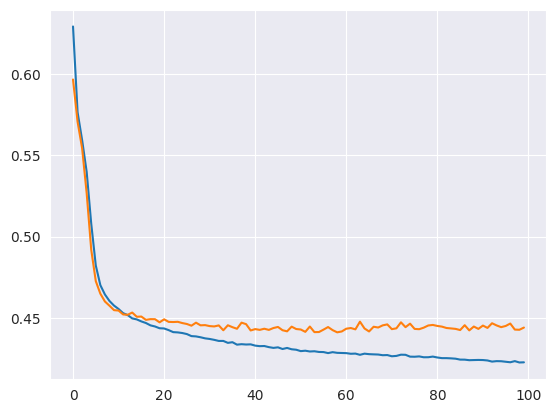

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

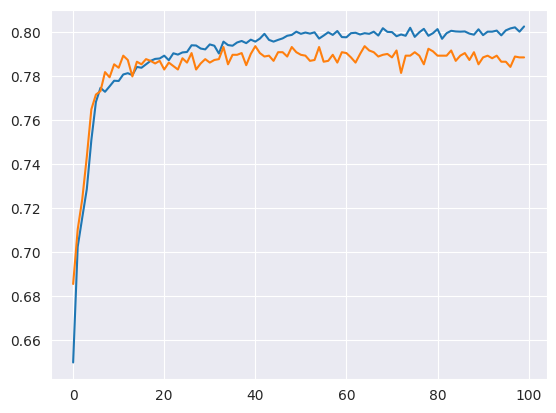

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Step 10: Evaluating the ANN Model & Predicting Churn for New Customers

After training, we evaluate the performance of the ANN model using the testing dataset. We calculate various evaluation metrics such as accuracy, precision, recall, and F1 score to assess how well the model predicts customer churn.

In [37]:
y_log = model.predict(X_test_scaled)

100/100 [==============================] - 0s 2ms/step


In [38]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [39]:
accuracy_score(y_test, y_pred)

0.788135593220339